# Multivariate Linear Regression with Gradient Descent

## Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/Startups_Data.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
features = ['R&D Spend','Administration','Marketing Spend']
target = 'Profit'
X = data[features]
Y = data[target]

> Kita tidak memakai feature state karena data tersebut tidak numerikal

## Exploratory Data Analysis

In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


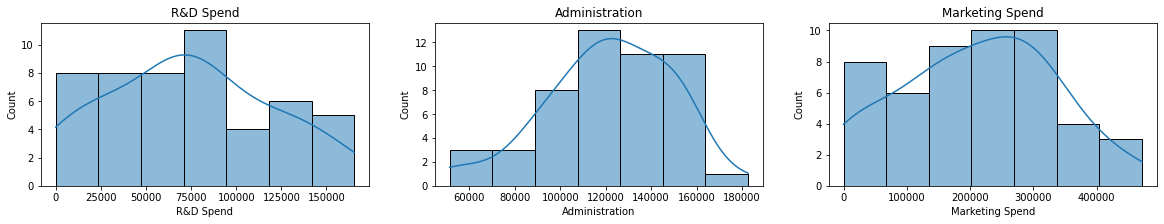

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(20, 3))
sns.histplot(data['R&D Spend'], ax=ax[0], kde=True, legend=False)
ax[0].set_title('R&D Spend')

sns.histplot(data['Administration'], ax=ax[1], kde=True, legend=False)
ax[1].set_title('Administration')

sns.histplot(data['Marketing Spend'], ax=ax[2], kde=True, legend=False)
ax[2].set_title('Marketing Spend')
plt.show()

> Bisa dilihat bahwa datanya tidak memiliki skewness yang begitu berarti, sehingga normalisasi tidak diperlukan

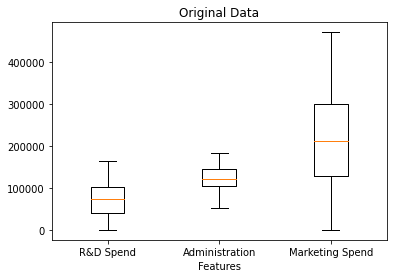

In [22]:
plt.boxplot(X)
plt.title('Original Data')
plt.xlabel('Features')
positions = (1,2,3)
labels = ('R&D Spend','Administration', 'Marketing Spend')
plt.xticks(positions, labels)
plt.show()

> Bisa dilihat, bahwa data ini tidak memiliki outlier, namun bisa kita lebih tingkatkan kebersihan data dengan melakukan standardisasi

## Standardizing Data

In [14]:
sc = StandardScaler()
X_trans = sc.fit_transform(X)

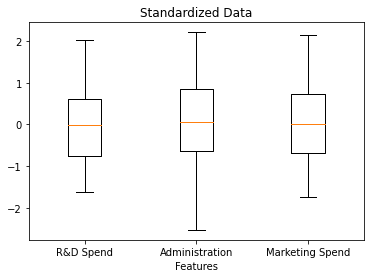

In [24]:
plt.boxplot(X_trans)
plt.title('Standardized Data')
plt.xlabel('Features')
positions = (1,2,3)
labels = ('R&D Spend','Administration', 'Marketing Spend')
plt.xticks(positions, labels)
plt.show()

> Dari sini, bisa dilihat bahwa setelah di standardisasi, pembagian angkanya lebih rapi dan bisa meningkatkan performa model kita.

## Modelling

In [32]:
def y_predict(weight, X, intercept):
    predicted_list = []
    for i in range(len(X)):
        predicted_list.append(np.dot(weight,X[i])+intercept)
    return np.array(predicted_list)

def MSE_loss_function(Y, Y_pred):
    length = len(Y)
    sum_value = 0
    for i in range(length):
        sum_value += (Y[i] - Y_pred[i])**2
    return (1/length)*sum_value

def derivative_weight(X, Y, Y_pred):
    length = len(Y)
    sum_value = 0
    for i in range(length):
        sum_value += (-X[i]*(Y[i] - Y_pred[i]))
    return (2/length)*sum_value

def derivative_bias(Y, Y_pred):
    length = len(Y)
    sum_value = 0
    for i in range(length):
        sum_value += (-(Y[i]-Y_pred[i]))
    return (2/length)*sum_value

def Gradient_Descent(X, Y):
    weight = np.random.randn(X.shape[1])
    intercept = 0
    epochs = 5000
    learning_rate = 0.002
    loss = []

    for _ in range(epochs):
        Y_pred = y_predict(weight, X, intercept)
        weight = weight - learning_rate * derivative_weight(X, Y, Y_pred)
        intercept = intercept - learning_rate * derivative_bias(Y, Y_pred)
        loss.append(MSE_loss_function(Y, Y_pred))
    
    # Plotting loss over epochs
    plt.plot(np.arange(1, epochs), loss[1:])
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss")

    return weight, intercept


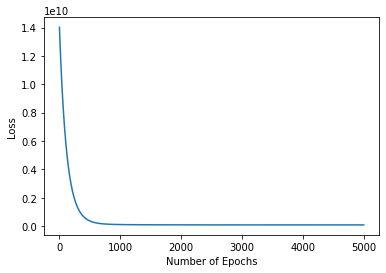

In [33]:
W, B= Gradient_Descent(X_trans, Y)

> Dapat dilihat, bahwa dengan metode **Gradient Descent**, model ini mampu meningkatkan performa model dengan baik

In [34]:
print(f'Weight : {W}')
print(f'Bias : {B}')

Weight : [36432.54967543  -680.41701653  3467.26953703]
Bias : 112012.63897820124


## Predict with the Model

In [35]:
def prediction(X_input):
    list = []
    for i in range(len(X_input)):
        list.append(np.dot(W,X_input[i]) + B)
    return np.array(list)

In [36]:
test_pred = prediction(X_trans)

## Comparing Ground Truth and Prediction

In [37]:
dataFrame_prediction = pd.DataFrame({
    'Ground Truth' : Y,
    'Prediction' : np.round(test_pred, 2)
})

dataFrame_prediction

,Ground Truth,Prediction
0,192261.83,192562.41
1,191792.06,189202.50
2,191050.39,182063.71
3,182901.99,173654.13
4,166187.94,172019.54
5,156991.12,163515.87
6,156122.51,157814.42
7,155752.60,160012.06
8,152211.77,151760.97
9,149759.96,154792.08


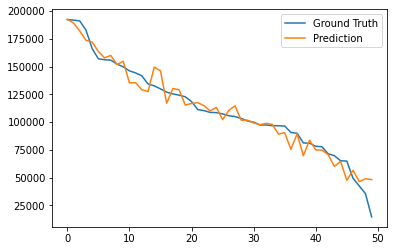

In [38]:
plt.plot(np.arange(0,50), dataFrame_prediction['Ground Truth'], label='Ground Truth')
plt.plot(np.arange(0,50), dataFrame_prediction['Prediction'], label = 'Prediction')
plt.legend()
plt.show()

## Mean Squared Error Value Using This Model

In [39]:
MSE_loss_function(Y, test_pred)

78431971.7479663